# Лабораторная работа по машинному обучению №3

## Выполнил студент группы 15-В-2   Зуевский Иван
### Вариант №14

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)

from scipy.stats import pearsonr, spearmanr
sns.set_style("darkgrid")

### 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Набор данных содержит информацию о работе электростанции

| Переменная   | Описание  | Параметр  | 
|--------------|--------------|-------------------|
|AT|средняя температура| вещественный|
|V|отработка|вещественный|
|AP|давление окружающей среды|вещественный|
|RH|относительная влажность|вещественный|
|PE|произведенная электроэнергия|вещественный|

Нужно предсказать количество произведенной энергии

In [2]:
df = pd.read_csv('Folds.txt')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (9568, 5)


AT    9568
V     9568
AP    9568
RH    9568
PE    9568
dtype: int64

### 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [4]:
print('dataset size before reduce: ', df.shape)
df = df.drop_duplicates()
df = df.dropna().reset_index(drop=True)
print('dataset size: ', df.shape)

dataset size before reduce:  (9568, 5)
dataset size:  (9527, 5)


### 3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

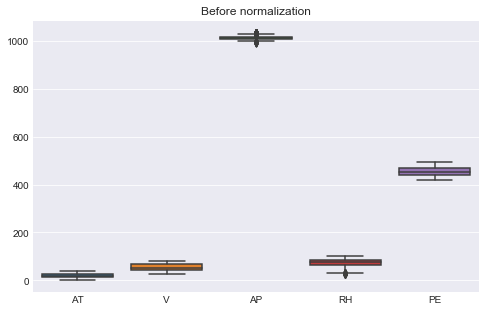

In [5]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']
plt.figure(figsize=(8,5))
sns.boxplot(data=df[numerical_columns])
plt.title("Before normalization")
plt.show()

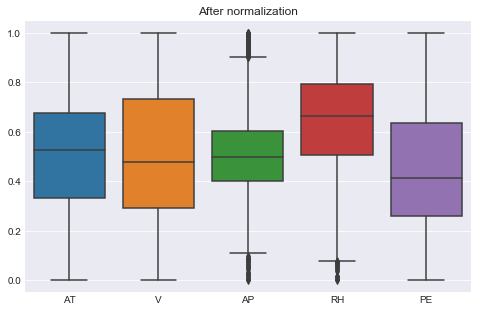

In [6]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

plt.figure(figsize=(8,5))
sns.boxplot(data=df[numerical_columns])
plt.title("After normalization")
plt.show()

### 4)	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Категориальных признаков нет

### 5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

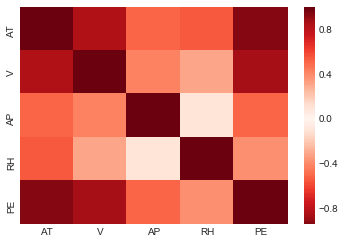

In [7]:
df_corr = df.corr()
colors = sns.color_palette("Reds_r", n_colors=100)
colors += sns.color_palette("Reds", n_colors=100)
sns.heatmap(df_corr, cmap=colors, center=0)
plt.show()

### 6) Заполните пропущенные значения в данных

In [8]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (9527, 5)


AT    9527
V     9527
AP    9527
RH    9527
PE    9527
dtype: int64

### 7)	Решите поставленную задачу регрессии в соответствии с заданием
 * Линейная регрессия без использования регуляризаторов
 * Линейная регрессия, Lasso регуляризатор

In [9]:
X, y = df.drop(['PE' ], axis=1), df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
reg = linear_model.Lasso (alpha = 0.1)
reg.fit (X_train, y_train)
xt = reg.predict(X_test)

In [10]:
reg.coef_

array([-0., -0.,  0.,  0.])

In [11]:
print(xt[:10]-y_test[:10])

8251    0.115894
1038    0.164239
8624    0.328080
8517    0.070729
5798    0.303842
7836    0.052583
7890    0.025034
4919   -0.219072
1811   -0.351655
6316    0.083577
Name: PE, dtype: float64


In [12]:
reg.intercept_

0.45231833765697188

In [13]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
xt = reg.predict(X_test)

In [14]:
reg.coef_

array([-0.92587268, -0.17200593,  0.0333563 , -0.15774725])

In [15]:
reg.intercept_

1.0924085219401816

In [16]:
print(xt[:10]-y_test[:10])

8251    0.010266
1038    0.082961
8624    0.007018
8517    0.038038
5798    0.009886
7836    0.030379
7890    0.065568
4919    0.032864
1811    0.016777
6316    0.030307
Name: PE, dtype: float64


In [17]:
corr={}
corr['pearson'], _ = pearsonr(xt,y_test)
corr['spearman'], _ = spearmanr(xt,y_test)
print(corr['pearson'])
print(corr['spearman'])

0.960978090981
0.959349905202
